<a href="https://colab.research.google.com/github/MioraIrinah/Machine-Learning/blob/main/Regression_California_Housing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
import kagglehub
import pandas as pd


# Download latest version
path = kagglehub.dataset_download("vjchoudhary7/customer-segmentation-tutorial-in-python")

print("Path to dataset files:", path)

df = pd.read_csv(path + "/Mall_Customers.csv")
df.head()



Path to dataset files: /kaggle/input/customer-segmentation-tutorial-in-python


,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


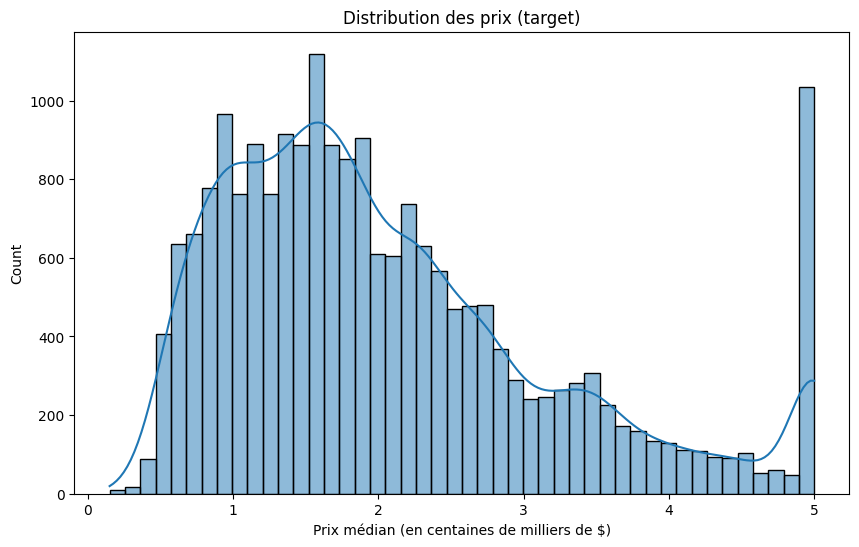

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns

# Taille moyenne des graphiques
plt.figure(figsize=(10,6))

# Histogramme du prix des maisons
sns.histplot(df['target'], kde=True)
plt.title("Distribution des prix (target)")
plt.xlabel("Prix médian (en centaines de milliers de $)")
plt.show()



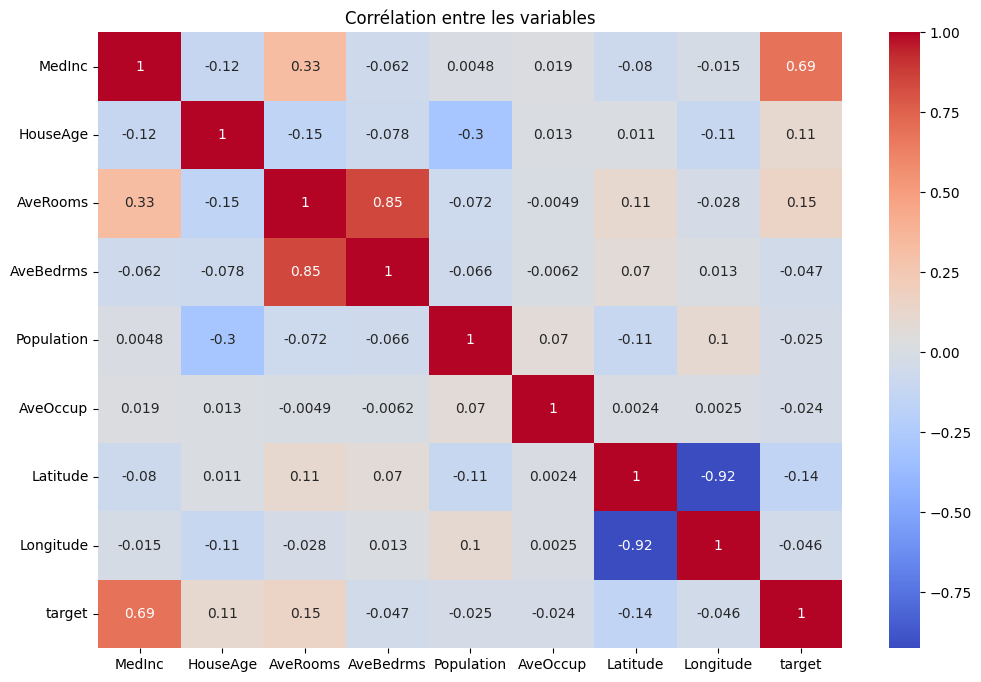

In [15]:
# Matrice de corrélation
plt.figure(figsize=(12,8))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm")
plt.title("Corrélation entre les variables")
plt.show()

In [13]:
from sklearn.model_selection import train_test_split

X = df.drop("target", axis=1)
y = df["target"]

# 60% train, 20% validation, 20% test
X_train_full, X_test, y_train_full, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train_full, y_train_full, test_size=0.25, random_state=42)

In [12]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)
X_test_scaled = scaler.transform(X_test)

In [10]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

lr = LinearRegression()
lr.fit(X_train_scaled, y_train)

y_pred_val = lr.predict(X_val_scaled)

print("Régression Linéaire - Validation")
print("MSE :", mean_squared_error(y_val, y_pred_val))
print("MAE :", mean_absolute_error(y_val, y_pred_val))
print("R² :", r2_score(y_val, y_pred_val))

Régression Linéaire - Validation
MSE : 0.5297481095803488
MAE : 0.5333346447415042
R² : 0.6142000785497264


In [9]:
from sklearn.linear_model import Ridge, Lasso

# Ridge
ridge = Ridge(alpha=1.0)
ridge.fit(X_train_scaled, y_train)
y_pred_ridge = ridge.predict(X_val_scaled)

# Lasso
lasso = Lasso(alpha=0.1)
lasso.fit(X_train_scaled, y_train)
y_pred_lasso = lasso.predict(X_val_scaled)

# Résultats
print("\nRidge")
print("MSE :", mean_squared_error(y_val, y_pred_ridge))
print("MAE :", mean_absolute_error(y_val, y_pred_ridge))
print("R² :", r2_score(y_val, y_pred_ridge))

print("\nLasso")
print("MSE :", mean_squared_error(y_val, y_pred_lasso))
print("MAE :", mean_absolute_error(y_val, y_pred_lasso))
print("R² :", r2_score(y_val, y_pred_lasso))


Ridge
MSE : 0.529736793597425
MAE : 0.5333291962768497
R² : 0.6142083196462856

Lasso
MSE : 0.6825254516439201
MAE : 0.6256907976095094
R² : 0.5029368470222007


In [8]:
s# Évaluation finale
y_pred_test = ridge.predict(X_test_scaled)

print("\nÉvaluation finale sur le test set (Ridge)")
print("MSE :", mean_squared_error(y_test, y_pred_test))
print("MAE :", mean_absolute_error(y_test, y_pred_test))
print("R² :", r2_score(y_test, y_pred_test))


Évaluation finale sur le test set (Ridge)
MSE : 0.5617308843794812
MAE : 0.5332900148277523
R² : 0.5713316272195021
